<a href="https://colab.research.google.com/github/sasansharifipour/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [ ]:
df = pd.read_csv('dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user                              1487 non-null   int64  
 1   task                              1487 non-null   int64  
 2   BACKGROUND_Duration (in seconds)  1487 non-null   int64  
 3   BACKGROUND_Knowledge              1487 non-null   int64  
 4   BACKGROUND_Interest               1487 non-null   int64  
 5   BACKGROUND_Information            1487 non-null   object 
 6   BACKGROUND_Opinion                1486 non-null   float64
 7   BACKGROUND_Picture                1486 non-null   object 
 8   REACTION_Duration (in seconds)    1482 non-null   float64
 9   REACTION_Reading                  1479 non-null   object 
 10  REACTION_Sharing                  1466 non-null   object 
 11  REACTION_Accuracy                 1482 non-null   float64
 12  PERCEP

,user,task,BACKGROUND_Duration (in seconds),BACKGROUND_Knowledge,BACKGROUND_Interest,BACKGROUND_Information,BACKGROUND_Opinion,BACKGROUND_Picture,REACTION_Duration (in seconds),REACTION_Reading,REACTION_Sharing,REACTION_Accuracy,PERCEPTION_Duration (in seconds),PERCEPTION_Knowledge,PERCEPTION_Satisfaction,PERCEPTION_Information,PERCEPTION_Opinion,PERCEPTION_Picture,PERCEPTION_Validation
0,6,1,71,5,5,internet browsing,2.0,Emotional,59.0,Maybe,Maybe,2.0,41.0,4.0,5.0,internet browsing,2.0,Emotional,2.0
1,7,1,62,1,5,TV,1.0,Emotional,113.0,No,No,1.0,42.0,1.0,4.0,TV,1.0,Emotional,1.0
2,8,1,62,5,4,newspapers (online or on paper),1.0,Factual,80.0,No,No,1.0,38.0,4.0,3.0,newspapers (online or on paper),1.0,Factual,1.0
3,10,1,70,5,5,internet browsing,1.0,Emotional,15.0,No,No,1.0,380.0,5.0,5.0,internet browsing,1.0,Factual,1.0
4,12,1,38,2,4,"social media (Instagram, Whatsapp, Facebook, e...",2.0,Factual,68.0,No,No,1.0,61.0,2.0,2.0,books,1.0,Factual,1.0


In [4]:
df['user'] = df['user'].astype('str')
df['task'] = df['task'].astype('str')

df['BACKGROUND_Information'] = df['BACKGROUND_Information'].astype('category')
df['BACKGROUND_Picture'] = df['BACKGROUND_Picture'].astype('category')
df['REACTION_Reading'] = df['REACTION_Reading'].astype('category')
df['REACTION_Sharing'] = df['REACTION_Sharing'].astype('category')
df['PERCEPTION_Information'] = df['PERCEPTION_Information'].astype('category')
df['PERCEPTION_Picture'] = df['PERCEPTION_Picture'].astype('category')


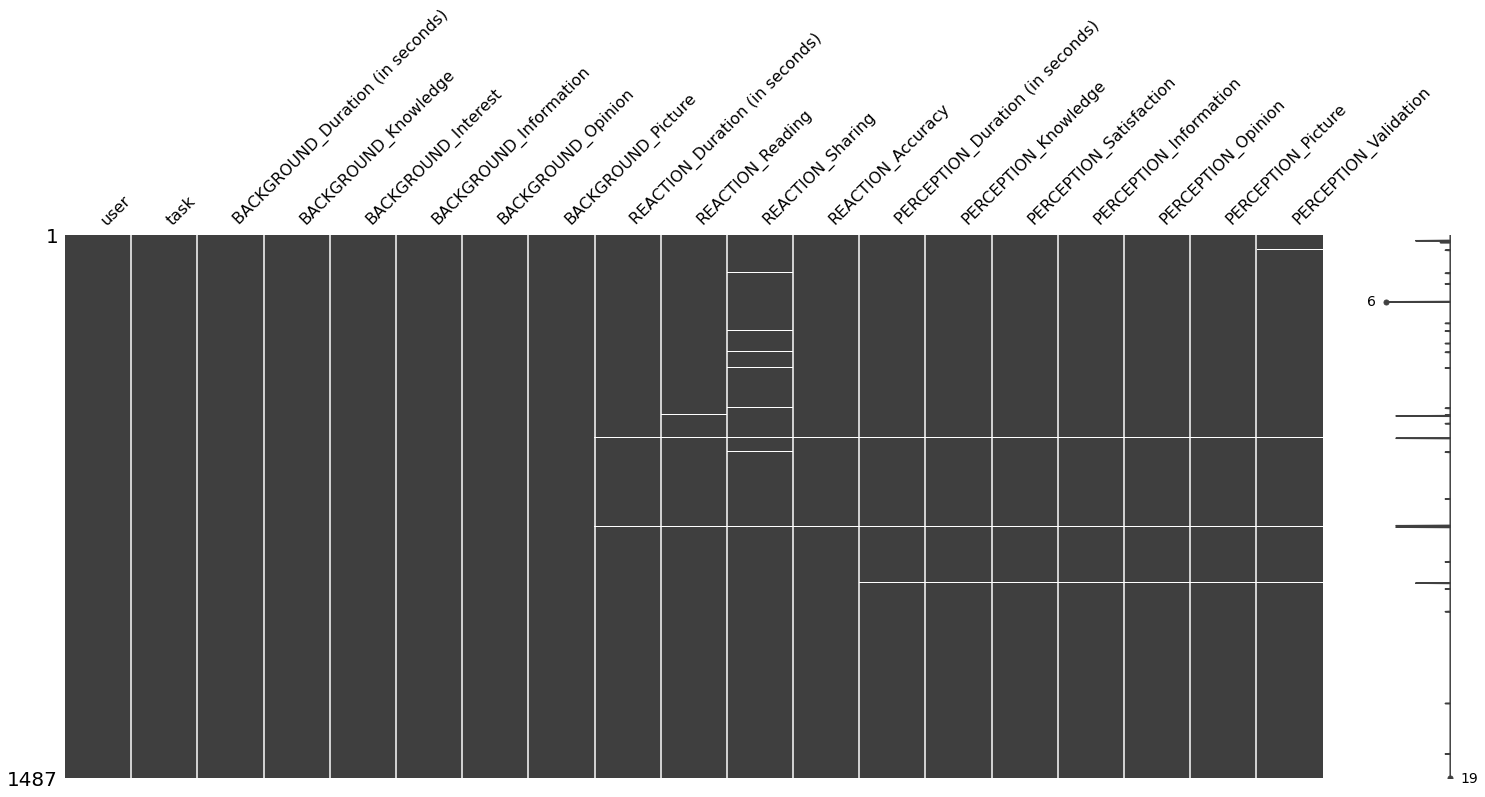

In [12]:
if df.isnull().any(axis=None):
    missingno.matrix(df)
    plt.show()

In [7]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [10]:
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    #top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()

To check: Unique count of non-numeric data
BACKGROUND_Information    8
BACKGROUND_Picture        2
REACTION_Reading          3
REACTION_Sharing          3
PERCEPTION_Information    8
PERCEPTION_Picture        2
dtype: int64


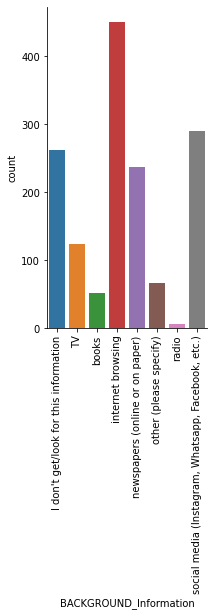

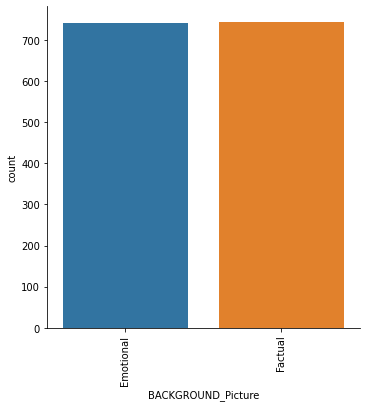

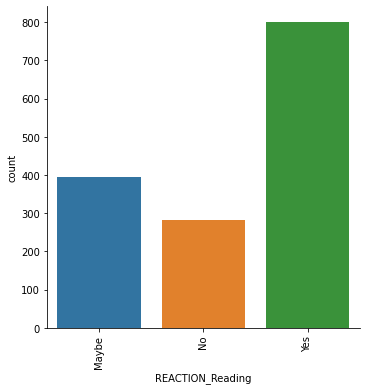

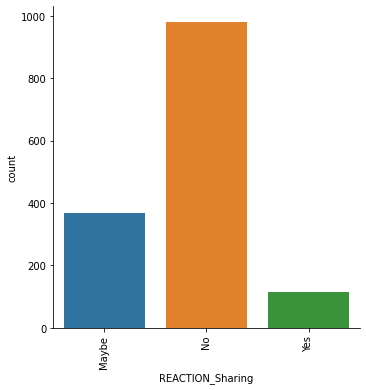

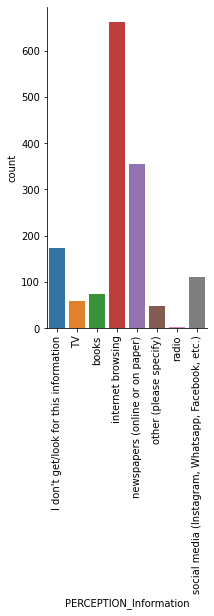

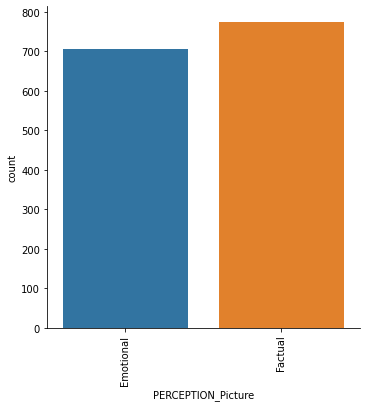

In [11]:
categorical_eda(df)